# **Food Vision with CNN**

# **Binary clssification**

# **1- Import data**

In [4]:
# Get the file from github (Food 101)

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-06-09 08:41:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.171.128, 142.250.152.128, 142.251.172.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.171.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   129MB/s    in 0.8s    

2023-06-09 08:41:24 (129 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
# Unzip the file

In [3]:
import zipfile
with zipfile.ZipFile("pizza_steak.zip","r") as zip_ref:
    zip_ref.extractall()
    zip_ref.close()

# **2- Inspect the data**

In [10]:
# Walk through the pizza-Steak directory and list number of file

In [30]:
import os
for (dirpath, dirnames, filenames) in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")
  print ("-------------------------------------------------------------------")

There are 2 directories and 0 images in pizza_steak.
-------------------------------------------------------------------
There are 2 directories and 0 images in pizza_steak/train.
-------------------------------------------------------------------
There are 0 directories and 750 images in pizza_steak/train/pizza.
-------------------------------------------------------------------
There are 0 directories and 750 images in pizza_steak/train/steak.
-------------------------------------------------------------------
There are 2 directories and 0 images in pizza_steak/test.
-------------------------------------------------------------------
There are 0 directories and 250 images in pizza_steak/test/pizza.
-------------------------------------------------------------------
There are 0 directories and 250 images in pizza_steak/test/steak.
-------------------------------------------------------------------


In [34]:
# Get the classnames programmatically

In [40]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/pizza_steak/train")
class_names = sorted([item.name for item in data_dir.glob("*")])
print(class_names)

['pizza', 'steak']


In [41]:
# Let's visualize our images

In [100]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  """
  view random image from target directory and selected class_name.
  """
  
  # Setup target directory (we will view image from here)
  target_folder = target_dir + target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f"Random image is: {random_image[0]}")
  
  # Read the image and plot it
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape is: {image.shape}")
  return image

Random image is: 3536393.jpg
Image shape is: (512, 512, 3)


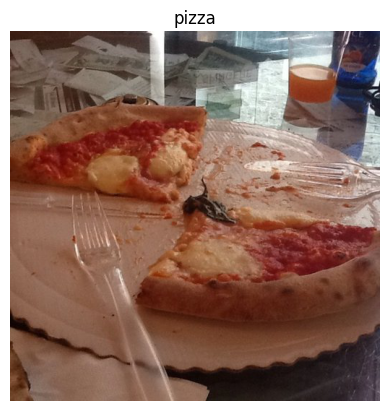

In [106]:
image = view_random_image(target_dir="pizza_steak/train/",
                  target_class="pizza")

# **3- Preprocess data**

In [114]:
# Define directory dataset paths

In [115]:
train_dir = "/content/pizza_steak/train"
test_dir  = "/content/pizza_steak/test"

In [116]:
# Create train and test data generator and rescale them

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [118]:
# Load in our image data from directories and turn them into batches

In [119]:
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224), # target size of images
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir, # target directory
                                               target_size=(224, 224), # target size of images
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# **4- Create a CNN model**

In [127]:
# import important libraries

In [132]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import Sequential

## **4-1- Creat the CNN model**

In [166]:
model = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# 

## **4-2- Compile the model**

In [167]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

## **4-3- Fit the model**

In [168]:
history = model.fit(train_data, 
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 389ms/step - loss: 0.7318 - accuracy: 0.6340 - val_loss: 0.4912 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3980 - accuracy: 0.8413 - val_loss: 0.4916 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.2395 - accuracy: 0.9180 - val_loss: 0.4063 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 12s 265ms/step - loss: 0.1372 - accuracy: 0.9687 - val_loss: 0.3700 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.0591 - accuracy: 0.9893 - val_loss: 0.4287 - val_accuracy: 0.8220


# **5- Evaluate the model**

In [169]:
model.evaluate(test_data)

16/16 [==============================] - 3s 154ms/step - loss: 0.4287 - accuracy: 0.8220


[0.42872101068496704, 0.8220000267028809]

<Axes: >

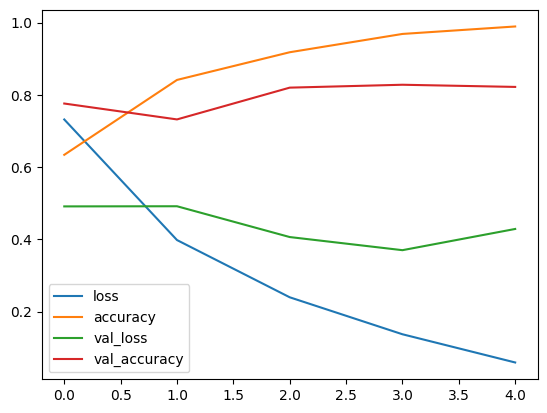

In [170]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [171]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["accuracy"]))

  # Plot loss curves
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, val_accuracy, label="Validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

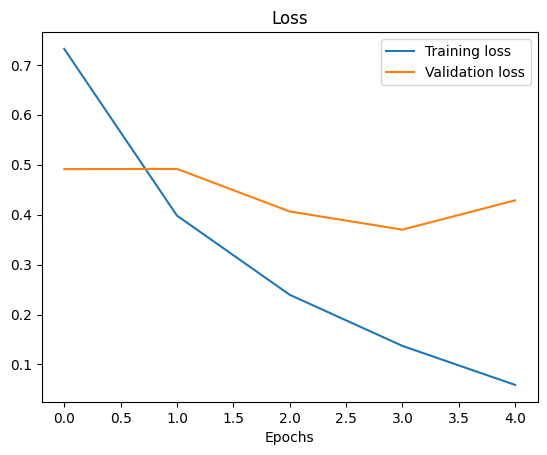

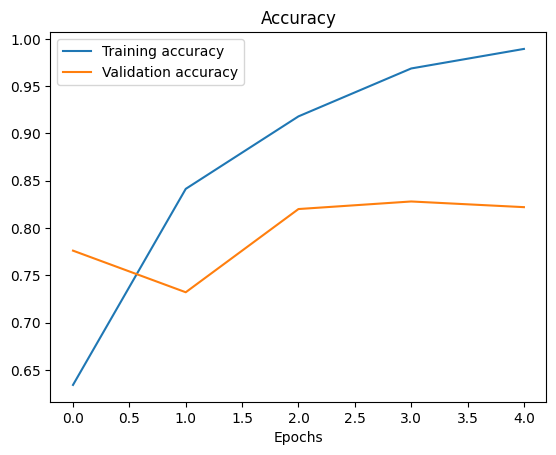

In [172]:
plot_loss_curves(history)

## **5-1- Adjust the model parameters**

In [173]:
# Create a CNN model
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.6350 - accuracy: 0.6360 - val_loss: 0.5461 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4454 - accuracy: 0.7987 - val_loss: 0.4535 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3224 - accuracy: 0.8700 - val_loss: 0.4597 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.2226 - accuracy: 0.9313 - val_loss: 0.4546 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.1209 - accuracy: 0.9680 - val_loss: 0.4531 - val_accuracy: 0.8120


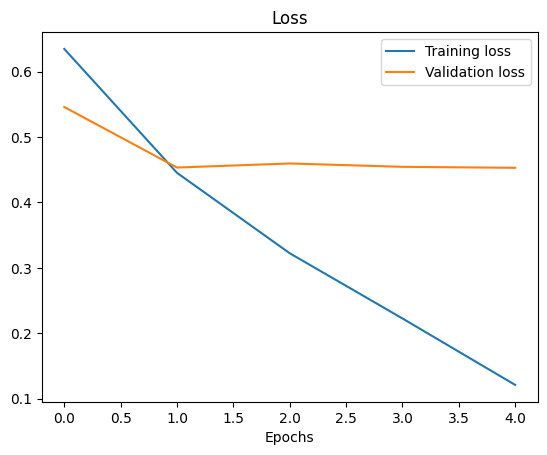

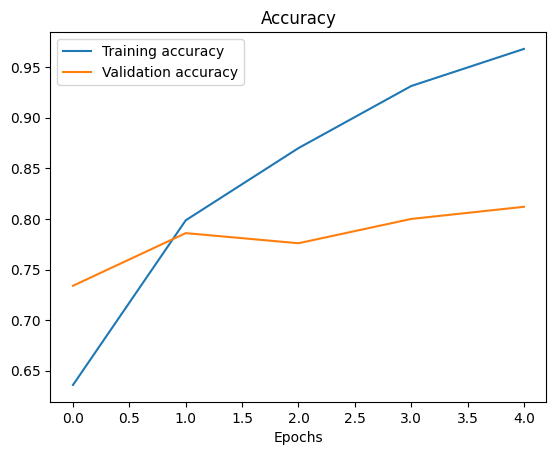

In [175]:
plot_loss_curves(history_1)

In [176]:
# Create a CNN model
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 218ms/step - loss: 0.6144 - accuracy: 0.6700 - val_loss: 0.4389 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4756 - accuracy: 0.7740 - val_loss: 0.4043 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 14s 298ms/step - loss: 0.4355 - accuracy: 0.8073 - val_loss: 0.3539 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3931 - accuracy: 0.8393 - val_loss: 0.3414 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 13s 274ms/step - loss: 0.3700 - accuracy: 0.8420 - val_loss: 0.3541 - val_accuracy: 0.8580


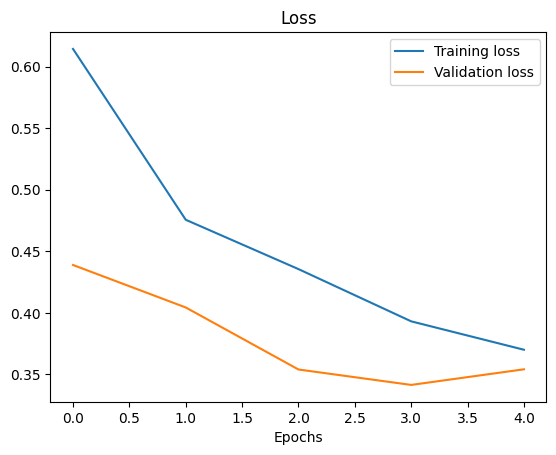

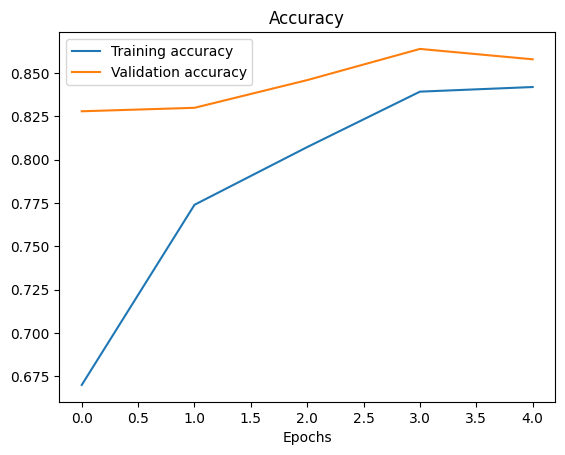

In [177]:
plot_loss_curves(history_2)

## **5-2- Data augmentation**

In [183]:
 # Create ImageGenerator training instance with data augmentation

In [181]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True,
                                             shear_range=0.2,
                                             zoom_range=0.2)

In [182]:
# impor data augmented from training directory

In [184]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

Found 1500 images belonging to 2 classes.


## **5-3- Create a model**

In [185]:
# Create a CNN model
model_3 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 661ms/step - loss: 0.7050 - accuracy: 0.4620 - val_loss: 0.6785 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6777 - accuracy: 0.6293 - val_loss: 0.6526 - val_accuracy: 0.5100
Epoch 3/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6731 - accuracy: 0.5587 - val_loss: 0.6589 - val_accuracy: 0.6600
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6825 - accuracy: 0.6340 - val_loss: 0.6563 - val_accuracy: 0.6540
Epoch 5/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6656 - accuracy: 0.6033 - val_loss: 0.6549 - val_accuracy: 0.6500


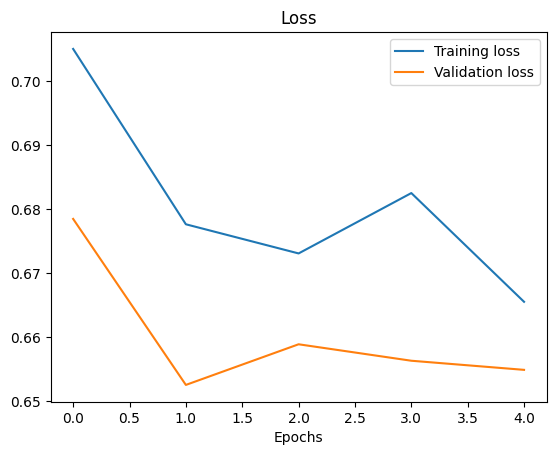

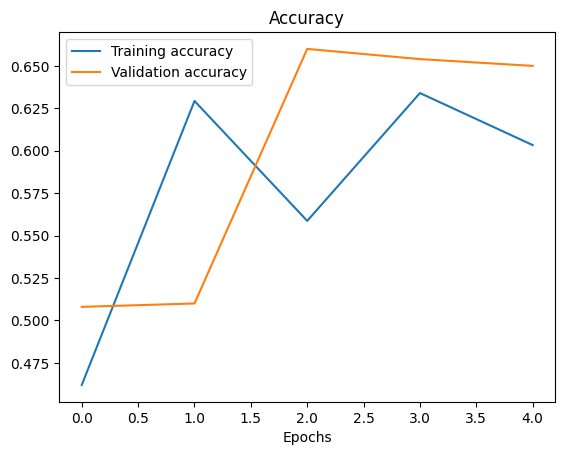

In [186]:
plot_loss_curves(history_3)

In [187]:
train_data_augmented_1 = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [190]:
# Create a CNN model
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented_1,
                      epochs=10,
                      steps_per_epoch=len(train_data_augmented_1),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 520ms/step - loss: 0.6511 - accuracy: 0.6180 - val_loss: 0.4848 - val_accuracy: 0.7820
Epoch 2/10
47/47 [==============================] - 24s 521ms/step - loss: 0.5472 - accuracy: 0.7273 - val_loss: 0.4434 - val_accuracy: 0.7900
Epoch 3/10
47/47 [==============================] - 24s 520ms/step - loss: 0.5098 - accuracy: 0.7647 - val_loss: 0.3503 - val_accuracy: 0.8760
Epoch 4/10
47/47 [==============================] - 24s 521ms/step - loss: 0.4530 - accuracy: 0.7993 - val_loss: 0.3164 - val_accuracy: 0.8700
Epoch 5/10
47/47 [==============================] - 24s 520ms/step - loss: 0.4518 - accuracy: 0.7807 - val_loss: 0.3987 - val_accuracy: 0.8120
Epoch 6/10
47/47 [==============================] - 24s 520ms/step - loss: 0.4554 - accuracy: 0.7953 - val_loss: 0.2867 - val_accuracy: 0.8920
Epoch 7/10
47/47 [==============================] - 24s 519ms/step - loss: 0.4038 - accuracy: 0.8260 - val_loss: 0.3503 - val_accuracy: 0.8400

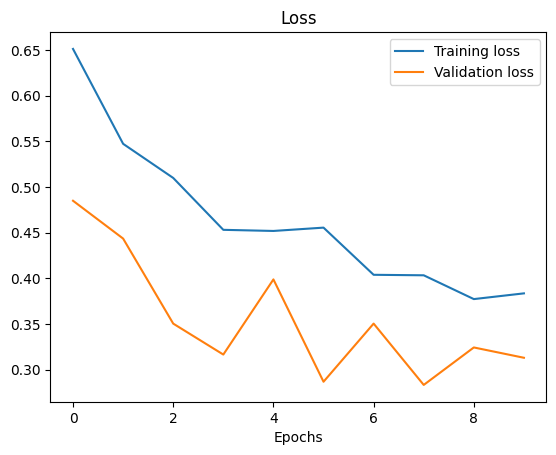

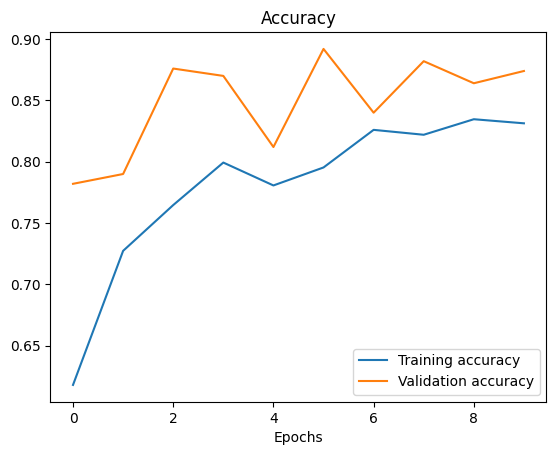

In [191]:
plot_loss_curves(history_4)

# **6- Make a prediction with our trained model**

# **7- Save the model**

In [192]:
model_4.save("saved_trained_model_4")